<a href="https://colab.research.google.com/github/reIkaros/jnotebooks/blob/main/HTR_experiment/HTR_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Обзор литературы по теме распознавания рукописного текста

##0. Предисловие

Системы извлечения текста из изображений существуют уже давно, считается, что начало было положено ещё в 1929 году.
Существующие системы, например, FineReader и Tesseract рассчитаны на печатный текст или, в лучшем случае, рукопечатный текст - OCR и ICR соответственно. С HTR (Handwritten Text Recognition) всё гораздо сложнее, так как невозможно выделить один или несколько шрифтов, которыми написан текст и это нужно учитывать при разработки системы распознавания.

Существуют достаточно качественные системы распознавания рукописного текста, например, приложение для Android и iOS - Pen to Print, но, как и ожидается, оно не работает с русским языком и кириллицей вообще:

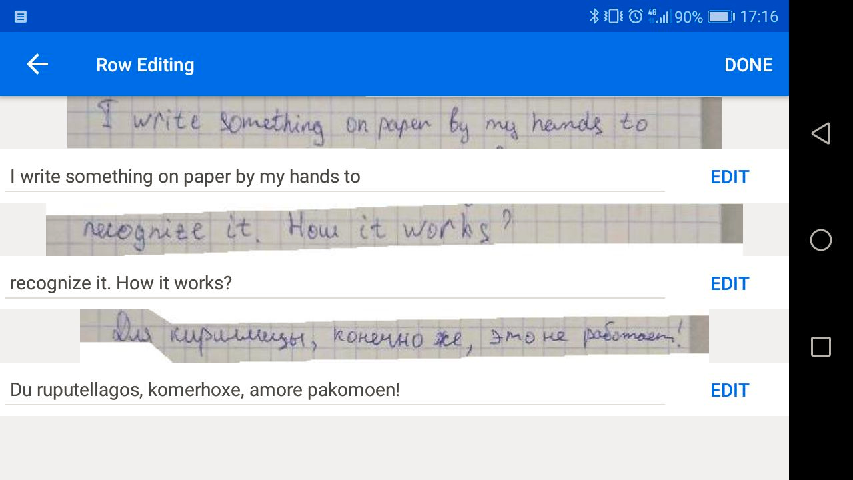

Встроенные в переводчики Яндекса и Google OCR так же могут выдать какой-то результат при наведении камеры на рукописный текст, но это, видимо, случайное совпадение написанного рукой с печатными шрифтами.

Также, стоит вспомнить о системах рукописного ввода, которые часто можно встретить на планшетах, однако, хотя они и очень качественно работают (например, система в Google Переводчике), но это другая технология, основанная, во многом, на считывании направления штрихов во время ввода.
О том, как подобная технология была разработана ещё в СССР и использовалась Apple можно почитать в статье https://www.iphones.ru/iNotes/kak-v-sssr-razrabatyvali-po-dlya-apple-sistema-i-segodnya-rabotaet-na-pochte-ssha-07-26-2021

##1. "Эксперимент в распознавании рукописных текстов на кириллице"
https://habr.com/ru/post/533350/

В данной статье продемонстрирован опыт в разработке модели распознавания рукописных слов.

Основой для разработанной модели послужили SimpleHTR, "система" распознавания рукописного текста, использующая TensorFlow, а также LineHTR, развитие SimpleHTR.

В работе используется датасет с более 200k изображений со словами и фразами на русском и казахском языках. Пример из датасета:

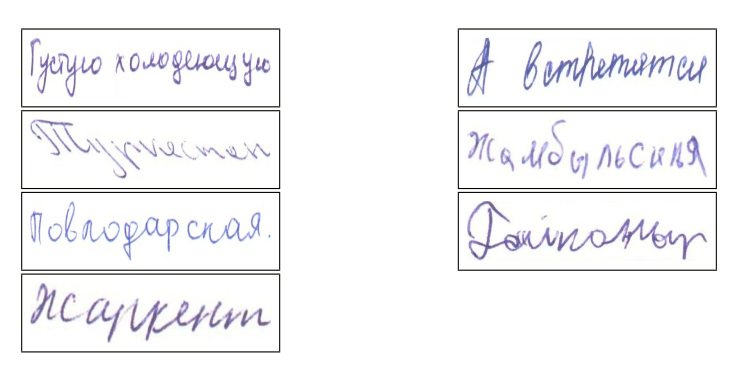


Пример работы разработанного инструмента:

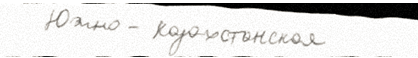

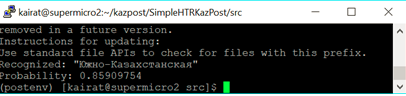

В статье говорится о финальных результатах в 75,1% точности, однако, исходников и ссылок на датасеты нет.

###2. "Как работает распознавание рукописного текста"

https://vc.ru/ml/96273-kak-rabotaet-raspoznavanie-rukopisnogo-teksta

В статье пошагово рассматривается процесс распознавания рукописного текста. Одним из заметных тезисов работы является утверждение об использовании большинством систем HTR гибридного подхода в распознавании, выраженном в использовании скрытой марковской модели и искусственной нейронной сети.

Согласно статье, готовая качественная система распознавания рукописного текста будет иметь "под капотом" как минимум классификатор символов, систему для составления слов из символов и модель для предсказания следующего наиболее вероятного слова.

Также, стоит обратить внимание на выравнивание наклона написанного текста, предполагаю, что это можно реализовать используя аффинные преобразования над линиями, найденными преобразованием Хафа.

##3. "Python + OpenCV + Keras: делаем распознавалку текста за полчаса"
https://habr.com/ru/post/466565/

В данной статье рассматривается построение собственной OCR системы на Python с использованием только лишь OpenCV и Keras. Полученая система строится на принципах, описанных в статье выше, обучена только для распознавания печатного текста. Предполагаю, что, используя исходные коды в статье, можно создать прототип системы для распознавания рукописного текста, если обучить модель на рукописных символах, используя датасет CoMNIST, а на этапе выделения границ букв делать размытие изображения, чтобы соединения букв в рукописном тексте не были видны.

##4. "Первое место на AI Journey 2020 Digital Петр"

https://habr.com/ru/post/535224/

В статье изложены материалы работы команды разработчиков в соревновании "Digital Петр". Изучены вопросы предобработки данных, архитектуры нейронных сетей, аугментации, разбиения строк на отдельные символы, ансамблирования. Принимая во внимание результаты работы авторов, можно использовать представленные данные в процессе разработки прототипа системы HTR для общего случая.

##5. Итоги

Рассмотрено 4 статьи, из которых 3 публикации на Хабр, 1 публикация на vc.ru:

1.   "Эксперимент в распознавании рукописных текстов на кириллице" (Хабр),
2.   "Как работает распознавание рукописного текста" (vc.ru),
3.   "Python + OpenCV + Keras: делаем распознавалку текста за полчаса" (Хабр),
4.   "Первое место на AI Journey 2020 Digital Петр" (Хабр)

Используя наработки, представленные в рассмотренных источниках, представляется возможным создание прототипа HTR системы с использованием аугментированного датасета CoMNIST, на основе подхода, представленного в статье "Python + OpenCV + Keras: делаем распознавалку текста за полчаса" для демонстрации возможностей HTR. Также, при любом значении точности прототипа, следует рассмотреть использование более продвинутых методов из статьи "Первое место на AI Journey 2020 Digital Петр", для улучшения результатов.

# 2. Протокол эксперимента

##1. Гипотезы

Использование существующих инструментов и свободных данных позволяет создать прототип инструмента HTR, удовлетворяющий целевым метрикам.

##2. Данные

В качестве исходных данных предлагается использовать датасет [CoMNIST](https://github.com/GregVial/CoMNIST), содержащий 28000+ изображений букв русского алфавита. Данный датасет планируется аугментировать, чтобы получить дополнительные изображения, включающие в себя следующие модификации исходных:

* повороты,
* размытие.

##3. Метрики

В качестве метрик качества разрабатываемого прототипа HTR-инструмента предлагается рассматривать:

*   точность распознавания (количество верных ответов ко всем ответам),
*   трудозатраты на разработку инструмента.



##4. Модели

В качестве модели разрабатываемого прототипа инструмента предлагается модель, описанная в статье "[Python + OpenCV + Keras: делаем распознавалку текста за полчаса](https://habr.com/ru/post/466565/)", а именно, "классическая сверточная сеть, выделяющая определенные признаки изображения (количество фильтров 32 и 64), к «выходу» которой подсоединена «линейная» сеть MLP, формирующая окончательный результат".

##5. Как данные и модели используются для гипотезы

Предлагается обучить предлагаемую модель на предлагаемом аугментированном датасете.

##6. Содержание проекта: что нужно сделать; что может помешать проекту

Необходимо:

1. Разработать инструмент предобработки входящих изображений рукописного текста, позволяющий разбивать текст на отдельные слова и слова на буквы.
2. Аугментировать датасет CoMNIST.
3. Построить необходимую модель и обучить её на полученых ранее аугментированных данных.
4. Провести первичную валидацию модели.
5. Разработать инструмент, объединяющий предобработку данных и распознавание рукописного текста.

Ожидаемые проблемы:

* Использование большого объёма данных для обучения может сильно повлиять на скорость обучения
* Высокая точность распознавания, вероятно, недостижима на данном этапе и для разработки инстумента с точностью распознавания >80% потребуется использование методов, описаных в статье "[Первое место на AI Journey 2020 Digital Петр](https://habr.com/ru/post/535224/)"

##7. Список источников



1. [Обзор литературы по теме распознавания рукописного текста](https://colab.research.google.com/drive/1HmxrsLJ0yUg81KgWKtepv4yhUTfKThz7#scrollTo=XKcMfpCezVx5)
2. [Cyrillic-oriented MNIST](https://github.com/GregVial/CoMNIST)
2. [Python + OpenCV + Keras: делаем распознавалку текста за полчаса](https://habr.com/ru/post/466565/)
3. [Первое место на AI Journey 2020 Digital Петр](https://habr.com/ru/post/535224/)



# 3. Отчёт

## 1. Аннотация

В ходе работы будет проведено обучение предлагаемой ранее модели на предлагаемом ранее аугментированном датасете.

## 2. Введение



Распознавание рукописного текста (англ. Handwritten Text Recognition, HTR) - это автоматический способ расшифровки записей с помощью компьютера.  Оцифрованный вид рукописных записей позволило бы автоматизировать многие бизнес процессы, упростив работу человека.

Предполагается, что, использование существующих инструментов (таких как нейросети) и свободных данных (датасетов) позволяет создать прототип инструмента HTR, обеспечивающий точность распознавания выше чем случайное предположение. К тому же, дальнейшее развитие прототипа позволит создать действительно рабочий инструмент HTR с высокой точностью распознавания, который можно будет использовать в работе.

Предположения выше основываются на анализе статей по тематике HTR, а так же на информации о достижениях ИИ в области распознавания образов.

Нейросети и открытые датасеты были выбраны в качестве основы для разрабатываемоего инструмента ввиду их повсеместного использования в задачах классификации, распознавания и детекции объектов.

Для проверки гипотез были найдены открытый датасет CoMNIST, нейросеть с достаточно простой архитектурой и алгоритмы предобработки, которые позволяют проверить гипотезы, разработан прототип модели HTR, проведены эксперименты.

По результатам экспериментов сделан вывод о подтверждении гипотезы о возможности создания прототипа инструмента HTR с использованием простых открытых инструментов, представленных ниже.

## 3. Литературный обзор

1. [Cyrillic-oriented MNIST](https://github.com/GregVial/CoMNIST) - датасет для обучения.
2. [Python + OpenCV + Keras: делаем распознавалку текста за полчаса](https://habr.com/ru/post/466565/) - основной трактат для воспроизведения.
3. [Первое место на AI Journey 2020 Digital Петр](https://habr.com/ru/post/535224/) - возможные дополнения для алгоритма.


## 4. Данные

Для обучения модели распознавания рукописного текста был использован датасет CoMNIST, далее он будет представлен:

In [ ]:
# скачаем и распакуем датасет CoMNIST
! wget https://github.com/GregVial/CoMNIST/raw/master/images/Cyrillic.zip
! unzip Cyrillic.zip

In [ ]:
# удалим папку с изображениями буквы "I" и "Ъ" (с последним бывают проблемы)
! rm -R Cyrillic/I
! rm -R Cyrillic/Ъ

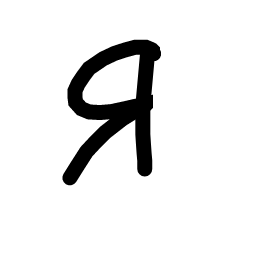

In [ ]:
# пример изображения в датасете
from IPython.display import Image
Image(filename=r'Cyrillic/Я/5a7747df79f11.png') 

## 5. Модели

В качестве модели распознавания была использована модель из статьи ["Python + OpenCV + Keras: делаем распознавалку текста за полчаса"](https://habr.com/ru/post/466565/), исходный код для запуска процесса обучения и код для инференса представлены далее:

#### Удаление и установка необходимых пакетов
После установки рекомендуется перезапустить среду выполнения

In [ ]:
# Удалим неподходящие пакеты для отработки алгоритма
!pip uninstall keras tensorflow h5py -y

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0


In [ ]:
# Установим необходимые зависимости
!pip install keras==2.2.5 tensorflow==1.14.0 h5py==2.10.0

     |████████████████████████████████| 336 kB 5.1 MB/s 
     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 2.9 MB 43.1 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 3.1 MB 18.6 MB/s 
     |████████████████████████████████| 488 kB 45.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


In [ ]:
import os
import cv2
import time
from tqdm import tqdm
from PIL import Image, ImageFilter, ImageOps
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras import backend as K
from keras.constraints import maxnorm
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

#### Код для обучения

In [ ]:
def emnist_model(labels_num=None):
    model = Sequential()
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
    model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(labels_num, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

def emnist_train(model, X_train, y_train_cat, X_test, y_test_cat):
    t_start = time.time()

    # Set a learning rate reduction
    learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

    # Required for learning_rate_reduction:
    keras.backend.get_session().run(tf.global_variables_initializer())

    model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), callbacks=[learning_rate_reduction], batch_size=64, epochs=9)
    print("Training done, dT:", time.time() - t_start)

def load_image_as_gray(path_to_image):
    img = Image.open(path_to_image)
    return np.array(img.convert("L"))

def load_image(path_to_image):
    img = Image.open(path_to_image)
    return img

def convert_rgba_to_rgb(pil_img):
    pil_img.load()
    background = Image.new("RGB", pil_img.size, (255, 255, 255))
    background.paste(pil_img, mask = pil_img.split()[3])
    return background

def prepare_rgba_img(img_path):
    img = load_image(img_path)
    if np.array(img).shape[2] == 4:
      new_img = convert_rgba_to_rgb(img)
      return new_img
    return img

In [ ]:
%%time
# размытие изображений
for lett in os.listdir("Cyrillic/"):
  for l in os.listdir(f"Cyrillic/{lett}"):
    if l != ".ipynb_checkpoints":
      img = Image.open(f"Cyrillic/{lett}/"+l)
      blurImage = img.filter(ImageFilter.BoxBlur(15))
      blurImage.save(f"Cyrillic/{lett}/"+"blur_"+l)

CPU times: user 2min 28s, sys: 2.85 s, total: 2min 31s
Wall time: 2min 30s


In [ ]:
%%time
# поворот изображений на +20 градусов
for lett in os.listdir("Cyrillic/"):
  for l in os.listdir(f"Cyrillic/{lett}"):
    if (l != ".ipynb_checkpoints") & ("blur_" not in l):
      img = Image.open(f"Cyrillic/{lett}/"+l)
      rotImage = img.rotate(20)
      rotImage.save(f"Cyrillic/{lett}/"+"rot20_"+l)

CPU times: user 1min 41s, sys: 2.42 s, total: 1min 44s
Wall time: 1min 43s


In [ ]:
%%time
# поворот изображений на -20 градусов
for lett in os.listdir("Cyrillic/"):
  for l in os.listdir(f"Cyrillic/{lett}"):
    if (".ipynb_checkpoints" not in l) & ("rot20_" not in l) & ("blur_" not in l):
      img = Image.open(f"Cyrillic/{lett}/"+l)
      rotImage = img.rotate(-20)
      rotImage.save(f"Cyrillic/{lett}/"+"rot02_"+l)

CPU times: user 1min 40s, sys: 2.41 s, total: 1min 42s
Wall time: 1min 42s


In [ ]:
%%time
# изменение размера изображений до 28x28
for lett in os.listdir("Cyrillic/"):
  for l in os.listdir(f"Cyrillic/{lett}"):
    if l != ".ipynb_checkpoints":
      img = Image.open(f"Cyrillic/{lett}/"+l)
      resized = img.resize((28, 28))
      resized.save(f"Cyrillic/{lett}/"+l)

CPU times: user 2min 29s, sys: 7.82 s, total: 2min 36s
Wall time: 2min 36s


In [ ]:
%%time
# преобразование изображений из RGBA в RGB
for lett in os.listdir("Cyrillic/"):
  for l in os.listdir(f"Cyrillic/{lett}"):
    if l != ".ipynb_checkpoints":
      rgb_img = prepare_rgba_img(f"Cyrillic/{lett}/"+l)
      rgb_img.save(f"Cyrillic/{lett}/"+l)

CPU times: user 24.7 s, sys: 5.96 s, total: 30.7 s
Wall time: 30.8 s


In [ ]:
# загрузка и разбитие на обучающую и тестовую выборки
X_train = []
X_test = []
y_train = []
y_test = []
for lett in tqdm(os.listdir("Cyrillic/")):
  data_count = len(os.listdir(f"Cyrillic/{lett}"))
  train_part = int(data_count*0.7)
  for c, l in enumerate(os.listdir(f"Cyrillic/{lett}")):
    if l != ".ipynb_checkpoints":
      if c+1 < train_part:
        X_train.append(load_image_as_gray(f"Cyrillic/{lett}/"+l))
        y_train.append(lett)
      else:
        X_test.append(load_image_as_gray(f"Cyrillic/{lett}/"+l))
        y_test.append(lett)        

100%|██████████| 32/32 [00:08<00:00,  3.77it/s]


In [ ]:
# предобработка
y_num = {l:i+1 for i, l in enumerate(np.unique(y_train))}

X_train = np.reshape(np.array(X_train), (np.array(X_train).shape[0], 28, 28, 1))
X_test = np.reshape(np.array(X_test), (np.array(X_test).shape[0], 28, 28, 1))

X_train = X_train.astype(np.float32)
X_train /= 255.0
X_test = X_test.astype(np.float32)
X_test /= 255.0

y_train_num = [y_num[i] for i in y_train]
y_test_num = [y_num[i] for i in y_test]

y_train_cat = keras.utils.to_categorical(np.array(y_train_num), 33)
y_test_cat = keras.utils.to_categorical(np.array(y_test_num), 33)

In [ ]:
# обучение
model = emnist_model(len(y_num)+1)
emnist_train(model, X_train, y_train_cat, X_test, y_test_cat)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 41321 samples, validate on 17775 samples
Epoch 1/9
41321/41321 [==============================] - 170s 4ms/step - loss: 1.5704 - acc: 0.5546 - val_loss: 0.6160 - val_acc: 0.8242
Epoch 2/9
41321/41321 [==============================] - 169s 4ms/step - loss: 0.6592 - acc: 0.8004 - val_loss: 0.4071 - val_acc: 0.8809
Epoch 3/9
41321/41321 [==============================] - 169s 4ms/step - loss: 0.4639 - acc: 0.8588 - val_loss: 0.3288 - val_acc: 0.9034
Epoch 4/9
41321/41321 [==============================] - 169s 4ms/step - loss: 0.3574 - acc: 0.8885 - val_loss: 0.2762 - val_acc: 0.9207
Epoch 5/9
41321/41321 [==============================] - 169s 4ms/step - loss: 0.2931 - acc: 0.9079 - val_loss: 0.2572 - val_acc: 0.9278
Epoch 6/9
41321/41321 [==========================

In [ ]:
model.save('comnist_letters_9.h5')

#### Код для инференса

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
!gdown --id 1qYjsph0LsMeGQhLEXKIy9YM5vZ-FJ6J6

Downloading...
From: https://drive.google.com/uc?id=1qYjsph0LsMeGQhLEXKIy9YM5vZ-FJ6J6
To: /content/comnist_letters_9.h5
57.1MB [00:00, 99.3MB/s]


In [ ]:
model = load_model("comnist_letters_9.h5")

## 6. Эксперименты

In [ ]:
# загрузка изображений
!gdown --id 1-3DCX0pTA68kGosKjWVJk9XK67kFWpCU
!gdown --id 1ZZaGqj0lg30T7GBh10VOHtbFkS51BjaH

Downloading...
From: https://drive.google.com/uc?id=1-3DCX0pTA68kGosKjWVJk9XK67kFWpCU
To: /content/test.png
100% 63.7k/63.7k [00:00<00:00, 29.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZZaGqj0lg30T7GBh10VOHtbFkS51BjaH
To: /content/test3.png
100% 35.4k/35.4k [00:00<00:00, 34.1MB/s]


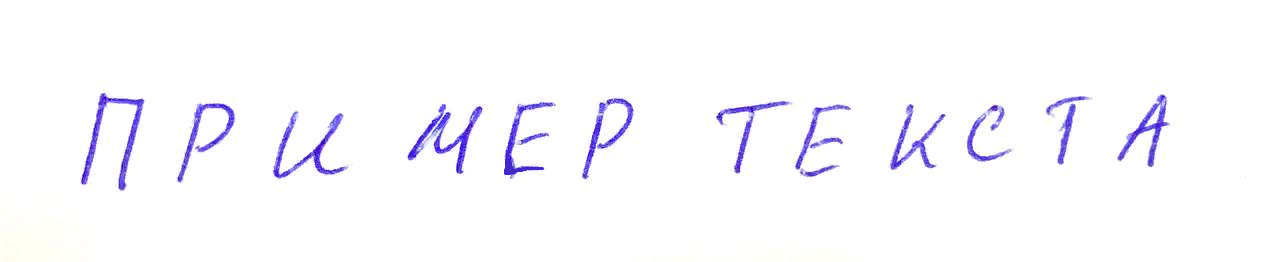

In [ ]:
from PIL import Image
img = Image.open("test.png")
img

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# разбитие строки на отдельные буквы
def letters_extract(image_file: str, out_size=28):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

    # Get contours
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = img.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)
    return letters

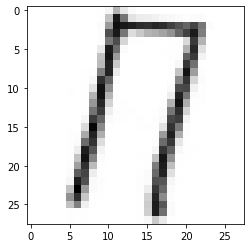

In [ ]:
lttrs = letters_extract("test.png", 28)
plt.imshow(lttrs[0][2], cmap="gray")

In [ ]:
# объявление словаря букв
y_num = {'Ё': 1,
         'А': 2,
         'Б': 3,
         'В': 4,
         'Г': 5,
         'Д': 6,
         'Е': 7,
         'Ж': 8,
         'З': 9,
         'И': 10,
         'Й': 11,
         'К': 12,
         'Л': 13,
         'М': 14,
         'Н': 15,
         'О': 16,
         'П': 17,
         'Р': 18,
         'С': 19,
         'Т': 20,
         'У': 21,
         'Ф': 22,
         'Х': 23,
         'Ц': 24,
         'Ч': 25,
         'Ш': 26,
         'Щ': 27,
         'Ы': 28,
         'Ь': 29,
         'Э': 30,
         'Ю': 31,
         'Я': 32}

In [ ]:
def get_lettr(ind, y_num):
  back_y = {v:k for k, v in y_num.items()}
  return back_y[ind]

for i in range(len(lttrs)):
  img_arr = lttrs[i][2]
  img_arr = img_arr/255.0
  input_img_arr = img_arr.reshape((1, 28, 28, 1))
  result = model.predict_classes([input_img_arr])
  print(get_lettr(result[0], y_num))

П
Р
Ц
М
Е
Р
Т
Е
Х
С
Т
А


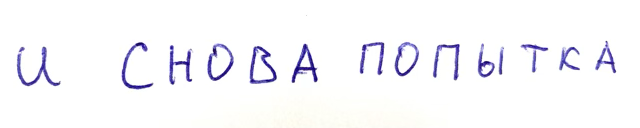

In [ ]:
# другое изображение
img = Image.open("test3.png")
img

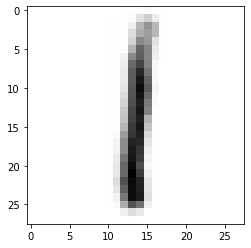

In [ ]:
# демонстрация проблемы в разбитии строки с "ы" - буква имеет промежуток,
# поэтому приведённым простым методом она разбивается на две отдельных
lttrs = letters_extract("test3.png", 28)
plt.imshow(lttrs[10][2], cmap="gray")

In [ ]:
for i in range(len(lttrs)):
  img_arr = lttrs[i][2]
  img_arr = img_arr/255.0
  input_img_arr = img_arr.reshape((1, 28, 28, 1))
  result = model.predict_classes([input_img_arr])
  print(get_lettr(result[0], y_num))

Ы
С
Н
О
В
А
П
О
П
Ь
У
Т
Е
А


## 7. Анализ экспериментов

В ходе проведённых экспериментов было выявлено, что обученая модель обеспечивает неплохую точность распознавания на представленных примерах:

*   для текста "пример текста", результат - "ПРЦМЕРТЕХСТА",
*   для текста "и снова попытка", результат - "ЫСНОВАПОПЬУТЕА".

Так же, было выявлено, что изображение для распознавания необходимо преобразовывать к малому разрешению (шириной в 640 будет достаточно), и, желательно, передавать максимально контрастным.

Помимо этого, следует отметить сомнительное качество датасета, символы в котором были начертаны мышью на экране, а именно рукописных символов довольно мало.

## 8. Выводы

Разработанный прототип инструмента распознавания рукописного текста при сравнительно малых временных затратах на разработку показал неплохие результаты работы.

Для дальнейшего развития предлагается использовать связку следующих технологий:

* Нейросеть YOLO для детекции и классификации букв на изображении.
* Алгоритм для обработки полученных данных, определения и разрешения перекрытий, обработки пробелов между словами.
* Алгоритм для сверки со словарём, коррекции орфографических ошибок.
* Скрытая марковская модель для предсказания вероятного следующего слова в тексте.

Также, необходимо найти/создать более качественный датасет рукописных кириллических букв, слов, фраз и т.д. Датасет необходимо расширить как приведёнными выше аугментациями, так и приведёнными в статье ["Первое место на AI Journey 2020 Digital Петр"](https://habr.com/ru/post/535224/).

